#Step 1: Reading in the Data

##1a) Import All Libraries

In [ ]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

##1b) Setting up Options

In [ ]:
#Pandas Options
pd.set_option('display.max_colwidth', 1000,
              'display.max_rows', None,
              'display.max_columns', None)
#preventing the dataframe frrom displaying
#too long a column by setting the
#max_colwidth to 1000

#Plotting Options
%matplotlib inline
mpl.style.use('ggplot')
sns.set(style='whitegrid')

##1c) Peeking at the Data

In [ ]:
loans = pd.read_csv(
    'https://www.alvinang.sg/s/LendingClubLoan200-rows.csv')

In [ ]:
loans.info()

#there are 73 columns!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 74 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           199 non-null    int64  
 1   member_id                    199 non-null    int64  
 2   loan_amnt                    199 non-null    int64  
 3   funded_amnt                  199 non-null    int64  
 4   funded_amnt_inv              199 non-null    float64
 5   term                         199 non-null    object 
 6   int_rate                     199 non-null    float64
 7   installment                  199 non-null    float64
 8   grade                        199 non-null    object 
 9   sub_grade                    199 non-null    object 
 10  emp_title                    190 non-null    object 
 11  emp_length                   198 non-null    object 
 12  home_ownership               199 non-null    object 
 13  annual_inc          

##1d) Taking a peek at the Lending Club Loan Dictionary

In [ ]:
xls = pd.read_excel('https://www.alvinang.sg/s/LCDataDictionary.xlsx', 
                    sheet_name = 'LoanStats', 
                    index_col = 'LoanStatNew')

In [ ]:
xls

,Description
LoanStatNew,
acc_now_delinq,The number of accounts on which the borrower is now delinquent.
acc_open_past_24mths,Number of trades opened in past 24 months.
addr_state,The state provided by the borrower in the loan application
all_util,Balance to credit limit on all trades
annual_inc,The self-reported annual income provided by the borrower during registration.
annual_inc_joint,The combined self-reported annual income provided by the co-borrowers during registration
application_type,Indicates whether the loan is an individual application or a joint application with two co-borrowers
avg_cur_bal,Average current balance of all accounts
bc_open_to_buy,Total open to buy on revolving bankcards.




---



#Step 2: Dealing with the 'Term' Column

##2a) What is the "Term" Column?

In [ ]:
xls.loc[['term']]

,Description
LoanStatNew,
term,The number of payments on the loan. Values are in months and can be either 36 or 60.


##2b) Peeking the "Term" Column

In [ ]:
loans['term'].sample(5)

#What's the problem?
#The word / string "months" make the data type
#unreadable... especially when we need to 
#import in for Machine Learning later on...
#we need to remove the word "months"

6       60 months
81      36 months
106     36 months
167     60 months
193     60 months
Name: term, dtype: object

##2c) Removing a String within a Column

In [ ]:
loans['term'] = loans['term'].\
              str.slice_replace(3, repl='')

##2d) Converting String to Number

In [ ]:
loans['term'] = loans['term'].astype(float)
#we need to convert 'dti' column to 'float' in order to feed the 
#Random Forest Classifier 

In [ ]:
loans['term'].sample(5)

#the word "month" has been removed!
#and data type is now a Number!

23     36.0
53     36.0
192    60.0
120    60.0
4      60.0
Name: term, dtype: float64



---



#Step 3: Dealing with the 'Sub_Grade' Column

##3a) What is the "Sub_Grade" Column?

In [ ]:
xls.loc[['sub_grade']]

,Description
LoanStatNew,
sub_grade,LC assigned loan subgrade


##3b) Peeking the "Sub_Grade" Column

In [ ]:
loans['sub_grade'].sample(5)

#What's the problem?
#The string datatype makes the data type
#unreadable... especially when we need to 
#import in for Machine Learning later on...
#we need to give number labels to the categories

91     B2
178    B4
3      C1
125    A4
130    B5
Name: sub_grade, dtype: object

##3c) Labeling Categories with Numbers

In [ ]:
a = loans['sub_grade'].astype('category')
b = a.cat.codes
df = pd.concat([a, b.rename('category')], axis = 1)

In [ ]:
df.sample(5)

,sub_grade,category
40,A3,2
11,B5,9
44,A1,0
156,C2,11
130,B5,9


In [ ]:
loans['sub_grade'] = loans['sub_grade'].\
                   astype('category').cat.codes

In [ ]:
loans['sub_grade'].sample(5)
#now every grade has been labelled with a number!
#and they are all now integers!

136     7
95     27
37      3
148     6
39      9
Name: sub_grade, dtype: int8



---



#Step 4: Dealing with the "Earliest_Cr_Line" Column

##4a) What is the "Earliest_Cr_Line" Column?

In [ ]:
xls.loc[['earliest_cr_line']]

,Description
LoanStatNew,
earliest_cr_line,The month the borrower's earliest reported credit line was opened


##4b) Peeking the "Earliest_CR_Line" Column

In [ ]:
loans['earliest_cr_line'].sample(5)

#What's the problem?
#The string datatype makes the data type
#unreadable... especially when we need to 
#import in for Machine Learning later on...

#First, we need to convert it to a "DateTime" format
#Then, we need to reconvert it back to a Number

194    Sep-1999
19     Jan-2001
180    Sep-2006
85     Oct-2002
94     Dec-1996
Name: earliest_cr_line, dtype: object

##4c) Attempting to Convert String to "Date Time" Format

In [ ]:
from datetime import datetime

loans['earliest_cr_line'] = \
    pd.to_datetime(
    loans['earliest_cr_line']
)
    
#we try converting directly to "datetime" format
#but an error pops up because there's a 
#hidden 0 lurking somewhere....

ParserError: ignored

In [ ]:
loans.loc[loans['earliest_cr_line'] =='0']

##the ZERO is lurking in Row 36!

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
36,1069361,1304255,10800,10800,10800.0,36.0,9.91,348.03,B,5,Department of Justice,2 years,RENT,55596.0,Source Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail.action?loan_id=1069361,"Borrower added on 12/19/11 > I have a very stable job &amp; am moving to get a better position. Thanks for your help!<br><br> Borrower added on 12/22/11 > Almost there, am ready to take care of business, Merry Christmas! ^_^<br>",moving,Moving to better job,help a veteran!,946xx,CA,5.5,0,Dec-2000,0.0,NaN,NaN,7,0,2535.0,13.3,18,f,0.0,0.0,12157.2,12157.2,10800.0,1357.2,0.0,0.0,0,Nov-2013,3483.79,NaN,Jan-2016,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
loans['earliest_cr_line'].iloc[33:39]
#we check the surrounding to see what value we can replace the 0 with...

33    Apr-2005
34    Oct-2007
35    Jul-2005
36           0
37    Nov-2004
38    Apr-2007
Name: earliest_cr_line, dtype: object

In [ ]:
loans['earliest_cr_line'].iloc[36] = 'Jun-2006'
#seems like Jun-2006 might be a good date to replace the 0...

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [ ]:
loans['earliest_cr_line'].iloc[33:39]
#Row 36 has been replaced!

33    Apr-2005
34    Oct-2007
35    Jul-2005
36    Jun-2006
37    Nov-2004
38    Apr-2007
Name: earliest_cr_line, dtype: object

In [ ]:
from datetime import datetime

loans['earliest_cr_line'] = \
          pd.to_datetime(\
          loans['earliest_cr_line'])

In [ ]:
loans['earliest_cr_line'].sample(5)

#Success! "earliest_cr_line" has now been converted to Date Time Format!

155   1999-05-01
114   1997-03-01
187   1989-09-01
111   1992-06-01
118   2003-06-01
Name: earliest_cr_line, dtype: datetime64[ns]

##4d) Converting from DateTime format back to Float

In [ ]:
loans['earliest_cr_line'] = \
                loans['earliest_cr_line'].dt.strftime("%Y%m%d%H%M%S")

In [ ]:
loans['earliest_cr_line']
#they all look like numbers... but are still in String type format...

0      19850101000000
1      19990401000000
2      20011101000000
3      19960201000000
4      19960101000000
5      20041101000000
6      20050701000000
7      20070101000000
8      20040401000000
9      20040901000000
10     19980101000000
11     19891001000000
12     20040401000000
13     20030701000000
14     19910501000000
15     20070901000000
16     19981001000000
17     19930801000000
18     20031001000000
19     20010101000000
20     19971101000000
21     19830201000000
22     19850701000000
23     20030401000000
24     20010601000000
25     20020201000000
26     20031001000000
27     20031001000000
28     19840801000000
29     20061101000000
30     19871201000000
31     19811101000000
32     19970201000000
33     20050401000000
34     20071001000000
35     20050701000000
36     20060601000000
37     20041101000000
38     20070401000000
39     20011201000000
40     20030101000000
41     19940301000000
42     19980901000000
43     20040601000000
44     19951101000000
45     199

In [ ]:
loans['earliest_cr_line'] = \
                loans['earliest_cr_line'].\
                astype(int)

In [ ]:
loans['earliest_cr_line']

#now all are integers!

0      19850101000000
1      19990401000000
2      20011101000000
3      19960201000000
4      19960101000000
5      20041101000000
6      20050701000000
7      20070101000000
8      20040401000000
9      20040901000000
10     19980101000000
11     19891001000000
12     20040401000000
13     20030701000000
14     19910501000000
15     20070901000000
16     19981001000000
17     19930801000000
18     20031001000000
19     20010101000000
20     19971101000000
21     19830201000000
22     19850701000000
23     20030401000000
24     20010601000000
25     20020201000000
26     20031001000000
27     20031001000000
28     19840801000000
29     20061101000000
30     19871201000000
31     19811101000000
32     19970201000000
33     20050401000000
34     20071001000000
35     20050701000000
36     20060601000000
37     20041101000000
38     20070401000000
39     20011201000000
40     20030101000000
41     19940301000000
42     19980901000000
43     20040601000000
44     19951101000000
45     199



---



#Step 5: Dealing with the "Loan Status" Column

##5a) What is the "loan_status" Column?

In [ ]:
xls.loc[['loan_status']]

,Description
LoanStatNew,
loan_status,Current status of the loan


##5b) Peeking the "loan_status" Column

In [ ]:
loans['loan_status'].value_counts(dropna=False)

#What's the problem?
#there are too many categories!
#(here there are only 3 because we only have 
#200 rows of data... but in the actual huge LCL 
#dataset.. we have around 8 categories..)

#we only want 2 Categories: 
#Fully paid vs Charged Off

Fully Paid     147
Charged Off     39
Current         13
Name: loan_status, dtype: int64

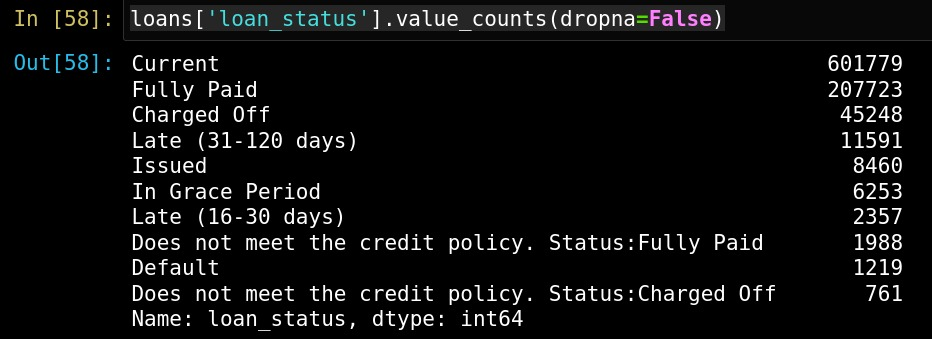

##5c) Using ISIN function to Reduce the Number of Categories

In [ ]:
loans = loans.loc[loans['loan_status'].\
                  isin(['Fully Paid', \
                        'Charged Off'])]

In [ ]:
loans['loan_status'].value_counts(dropna=False)

Fully Paid     147
Charged Off     39
Name: loan_status, dtype: int64

##5d) Display the 2 Loan Status Categories as %

In [ ]:
a = loans['loan_status'].\
value_counts(normalize = True,\
             dropna = False)

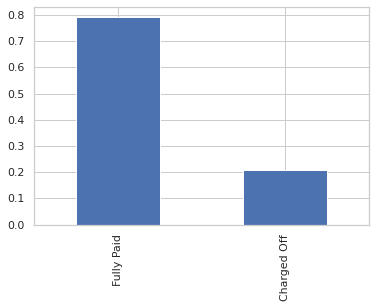

In [ ]:
a.plot(kind = 'bar')

##5e) Create a New Column called "Charged Off" where "Charged Off = 1" and "Fully Paid = 0"

In [ ]:
loans['charged_off'] = \
      (loans['loan_status'] == 'Charged Off').\
       apply(np.uint8)

In [ ]:
loans[['loan_status', 'charged_off']].sample(3)

,loan_status,charged_off
176,Charged Off,1
100,Charged Off,1
88,Fully Paid,0


##5f) Drop Off the "Loan Status" column since we don't need it anymore...

In [ ]:
loans.drop('loan_status', axis = 1, inplace = True)



---



#THE END